#### De Oliveira Thomas
#### Treard Louis

# SAE Transmission

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import time as toom
SLEEP = toom.sleep(1)

### Emission

In [ ]:
f = [1000,2000,3000,4000,10000,15000,17000,18000,19000,20000]
sample_rate = 100000
time = 7
for freq in f:
    temps = np.arange(0,time,1/sample_rate)
    phase=0
    w=((2*np.pi)*freq*temps)+phase
    sin_vecteur = 1*np.sin(w)
    sd.play(sin_vecteur,sample_rate)
    sd.wait()
    toom.sleep(5)

### Reception du bruit

In [127]:
fe=1
f = 100000
time = 5
threshold = 0.001
records = []
amplis_max = []
freq_array = []
ampli_array=[]


def seuil(signal, threshold):
    return np.max(np.abs(signal)) > threshold


while(1):
    signal = sd.rec(int(1 * fe), samplerate=f, channels=1)
    sd.wait()
    ampli_max = np.max(np.abs(signal))
    print("attente de signal")
    if (ampli_max > threshold):
        print("signal détecté")
        break
    
while(ampli_max > threshold):
    x=0
    recording = sd.rec(int(time * f), samplerate=f, channels=1)
    sd.wait()
    for i in range(len(recording)):
        if i != (f*time-1):
            if recording[i] > 0:
                if recording[i+1] < 0:
                    x+=0.5
            elif recording[i] < 0:
                if recording[i+1] >0:
                    x+=0.5
    fi = x/time
    ampli_max = np.max(np.abs(signal))
    records.append(recording)
    amplitude = (max(recording)+abs(min(recording)))/2
    ampli_array.append(amplitude)
    amplis_max.append(ampli_max)
    freq_array.append(fi)
    print(fi,amplitude)
    toom.sleep(4)
    while(1):
        signal = sd.rec(int(1 * fe), samplerate=f, channels=1)
        sd.wait()
        ampli_max = np.max(np.abs(signal))
        print("attente de signal")
        i+=1
        if ampli_max > threshold:
            i = 0
            print("Début")
            break
        elif i >= 15:
            break
        


attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
signal détecté
998.6 [0.99998474]
attente de signal
Début
1999.3 [0.99998474]
attente de signal
Début
2999.6 [0.99998474]
attente de signal
Début
3999.2 [0.99998474]
attente de signal
Début
9654.0 [0.99998474]
attente de signal
Début
13052.0 [0.82977295]
attente de signal
Début
13599.9 [0.6494751]
attente de signal
Début
12812.5 [0.5767975]
attente de signal
Début
12356.0 [0.46629333]
attente de signal
Début
12105.4 [0.38479614]
attente de signal


In [124]:
print(records)
print(len(records))
print(freq_array)
print(amplis_max)
print(x)

[array([[0.97961426],
       [0.9999695 ],
       [0.9999695 ],
       ...,
       [0.64263916],
       [0.6192932 ],
       [0.5936279 ]], dtype=float32), array([[-0.38653564],
       [-0.32785034],
       [-0.11621094],
       ...,
       [-0.47698975],
       [-0.50946045],
       [-0.5339966 ]], dtype=float32), array([[-0.6802368 ],
       [-0.6476135 ],
       [-0.36273193],
       ...,
       [-0.00631714],
       [-0.10482788],
       [-0.19970703]], dtype=float32), array([[ 0.25115967],
       [ 0.07583618],
       [-0.2699585 ],
       ...,
       [ 0.12017822],
       [ 0.24914551],
       [ 0.36288452]], dtype=float32), array([[-3.0014038e-01],
       [ 2.0932007e-01],
       [ 8.9788818e-01],
       ...,
       [ 0.0000000e+00],
       [-3.0517578e-05],
       [-3.0517578e-05]], dtype=float32), array([[ 5.7589722e-01],
       [ 6.2744141e-02],
       [-6.4361572e-01],
       ...,
       [-1.5258789e-04],
       [-6.1035156e-05],
       [ 3.0517578e-05]], dtype=float32), arr

### Visualisation

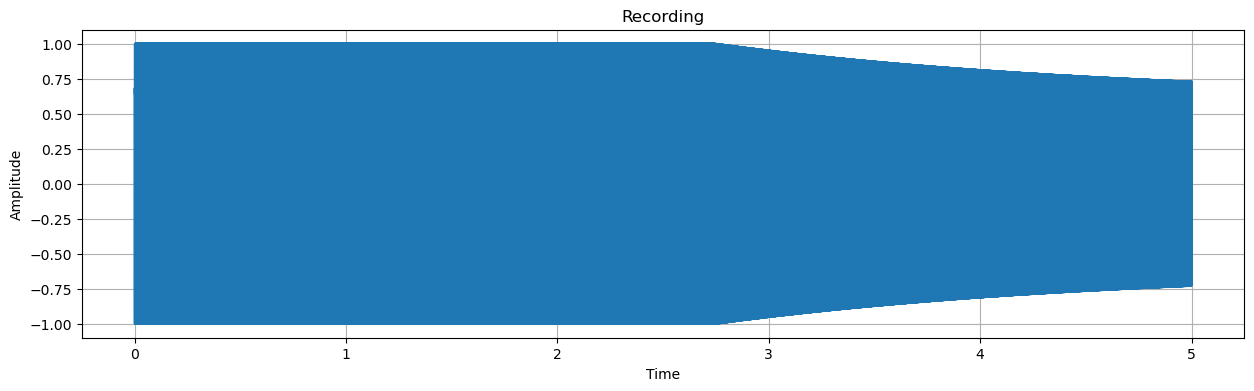

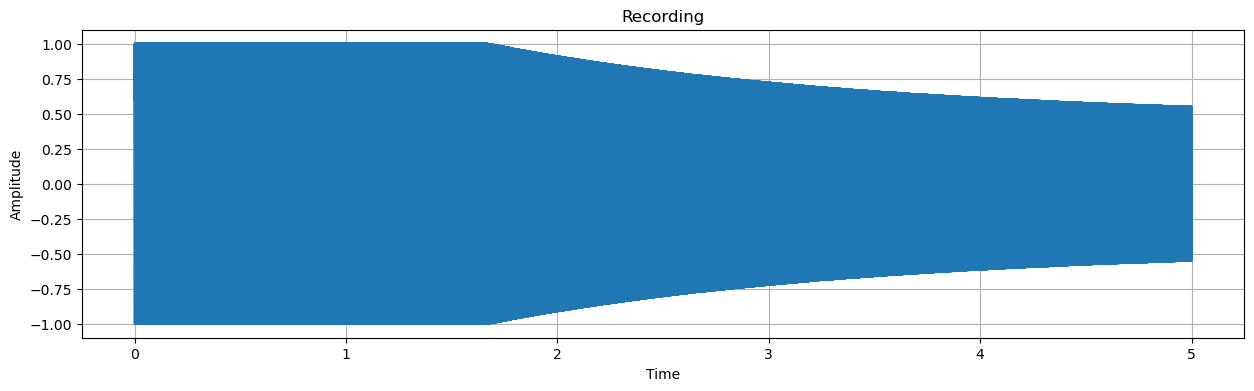

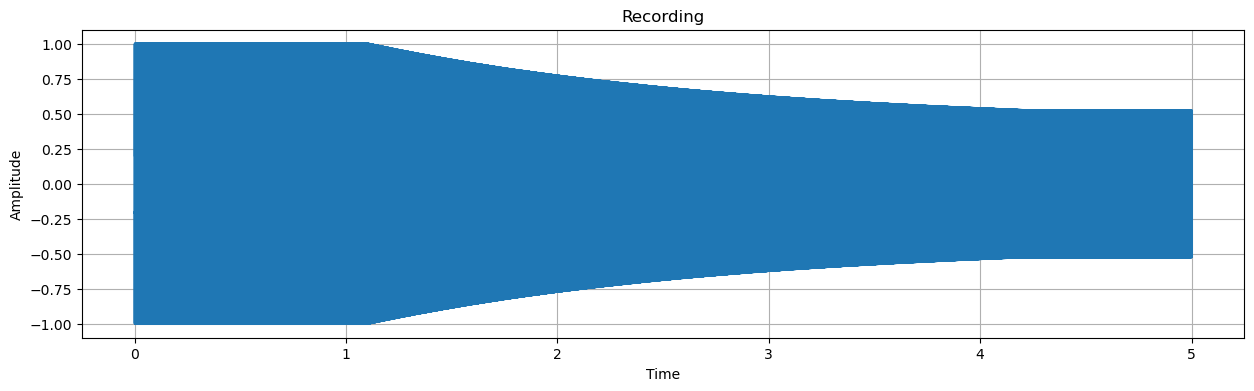

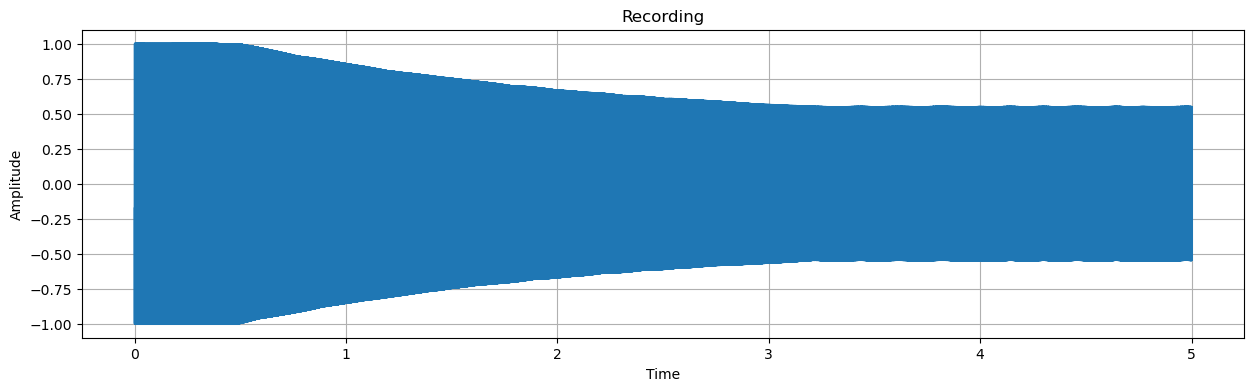

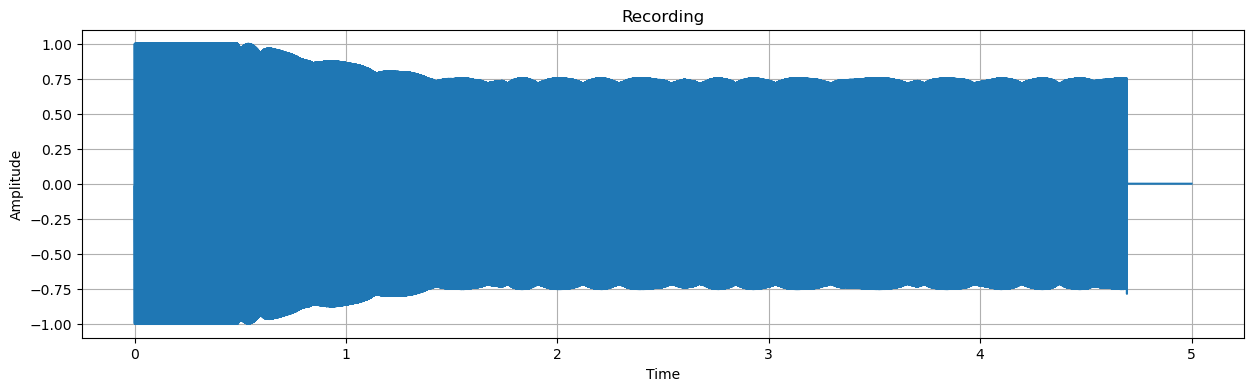

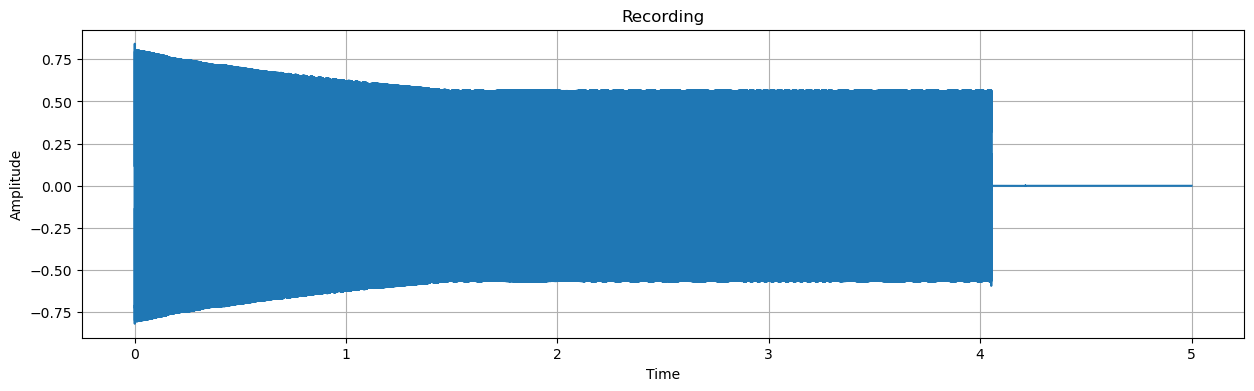

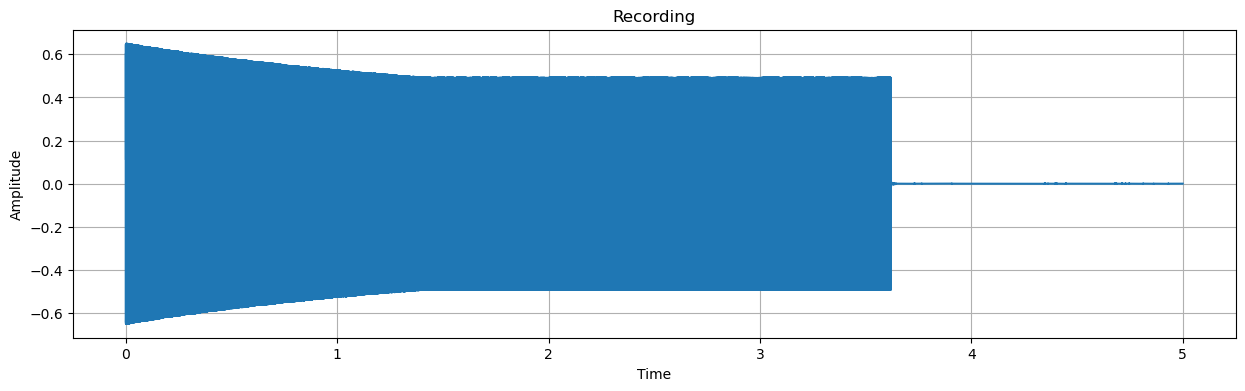

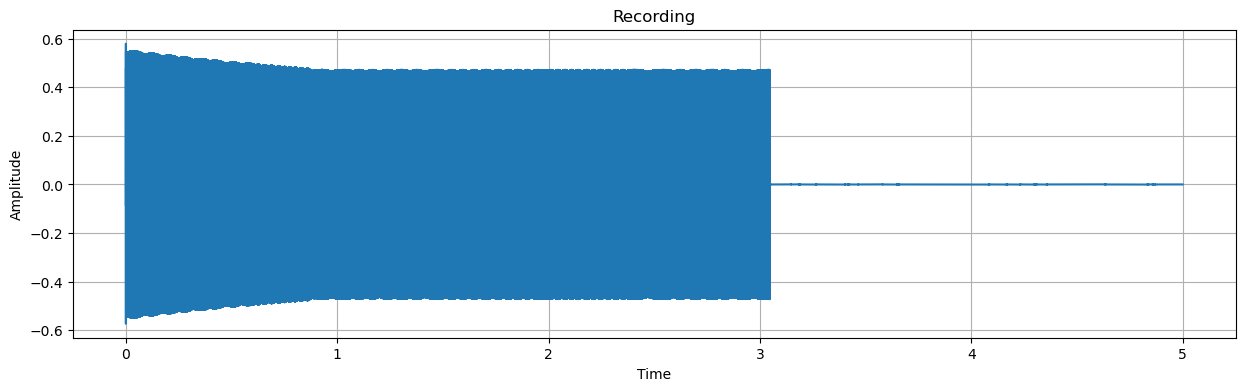

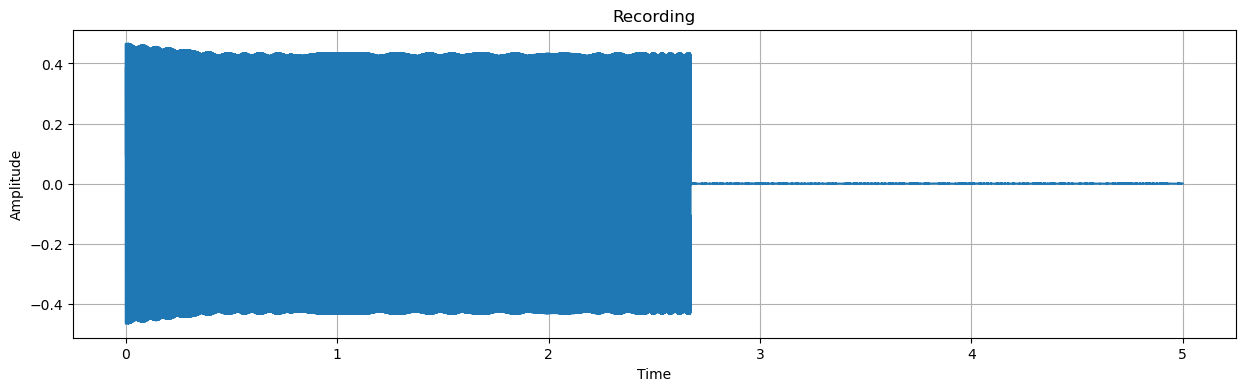

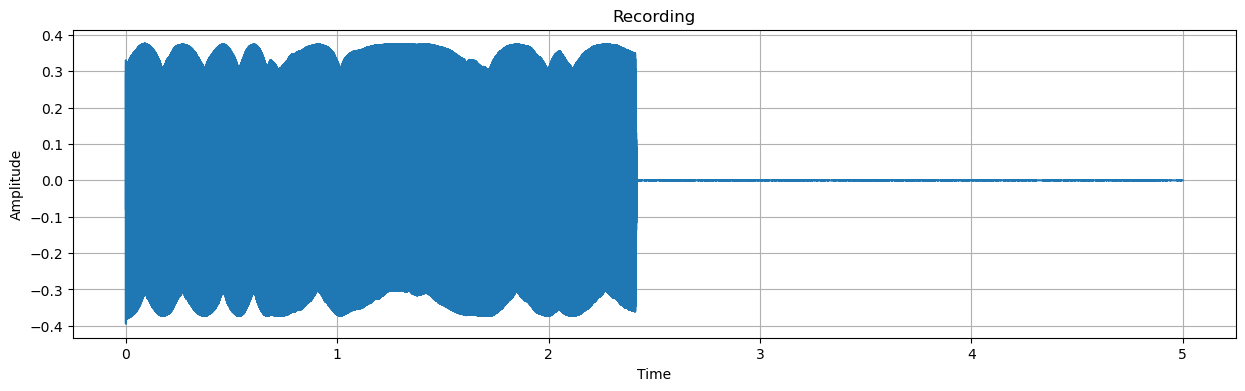

In [132]:
for i in range(len(records)):
    fig, ax = plt.subplots(1, 1, figsize=(15, 4))
    t = np.linspace(0, time, int(f * time), endpoint=False)
    ax.plot(t, records[i])
    ax.set_title('Recording')
    ax.set_xlabel("Time")
    ax.grid(True)
    ax.set_ylabel("Amplitude")


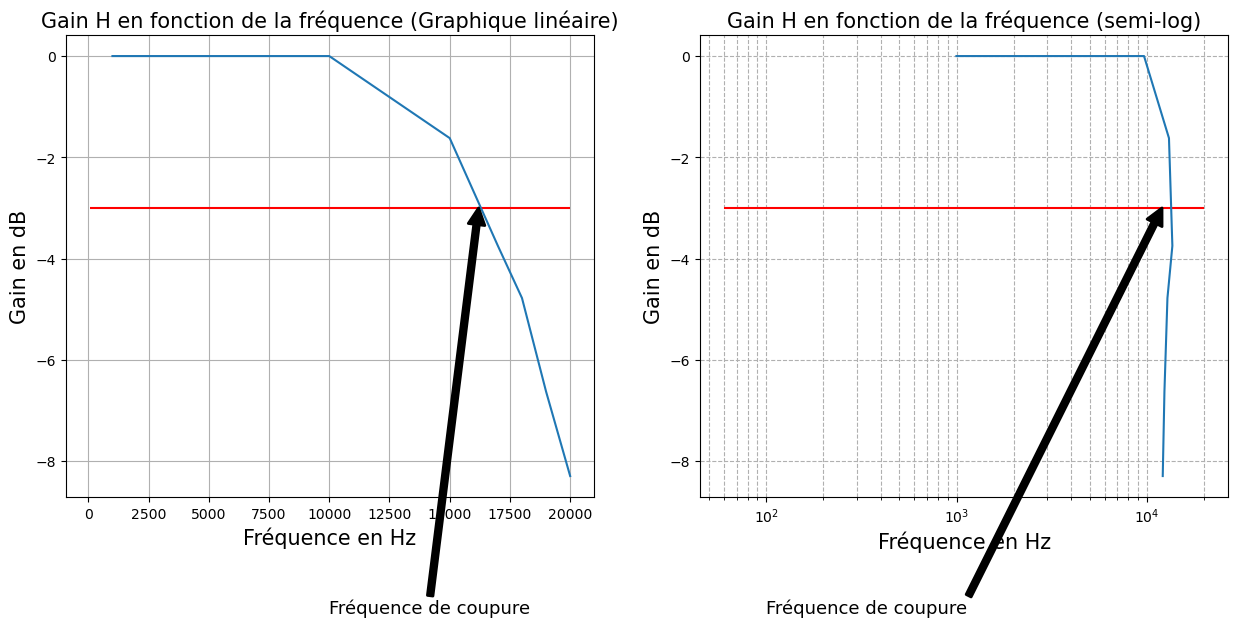

In [151]:
liste_f = [1000,2000,3000,4000,10000,15000,17000,18000,19000,20000]
Gain=20*np.log10(ampli_array)                                                            #Conversion en dB

#Affichage de deux axes sur une ligne d'une taille de 12 pouces sur 6 pouces

fig,ax = plt.subplots(1,2, figsize=(15,6)) 

####Axe 1

#Titre

ax[0].set_title("Gain H en fonction de la fréquence (Graphique linéaire)",fontsize=15)   
ax[0].set_xlabel("Fréquence en Hz",fontsize=15)     
ax[0].set_ylabel("Gain en dB",fontsize=15)

#Grille, ligne et annotation fléchées

ax[0].grid()                                
ax[0].hlines(max(Gain)-3,60,20000, color="r")
arrowprops = dict( color='black', linewidth=2)
ax[0].annotate('Fréquence de coupure',fontsize="13", xytext=(10000,-11), xy=(16200,max(Gain)-3), arrowprops=arrowprops)

#Affichage

ax[0].plot(liste_f,Gain)                 

####Axe 2

#Titre

ax[1].set_title("Gain H en fonction de la fréquence (semi-log)",fontsize=15)   #Titre de l'axe 2 semi-log
ax[1].set_xlabel("Fréquence en Hz",fontsize=15)     #Titre en abscisse
ax[1].set_ylabel("Gain en dB",fontsize=15)          #Titre en ordonné

#Ligne et annotation fléchées
                                       
ax[1].hlines(max(Gain)-3,60,20000, color="r")     
ax[1].annotate('Fréquence de coupure', fontsize="13", xytext=(100,-11), xy=(12000,max(Gain)-3), arrowprops=arrowprops)

#Affichage en semilog

ax[1].semilogx(freq_array,Gain)       
ax[1].grid(True,which="both", linestyle='--')